# Coronavirus COVID-19 Timeseries of Global Cases

This program maps the cornorvirus data using the data  sets from  center for sytems science and engineering
at the John Hopkins University. The data from the dash board as follows.
 - confirmed infected cases
 - recovered cases
 - deaths

In [69]:
# <import librarires > 
import pandas as pd  
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import numpy as  np
import pandas as pd

In [70]:
# Load data 
# Three csv files are found in https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

urlConfirmedFromCovid19 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
urlDeathsFromCovid19 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
urlRecoverdFromCovid19 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

confirmedDataSet =   pd.read_csv(urlConfirmedFromCovid19)
deathsDataSet    =   pd.read_csv(urlDeathsFromCovid19)
recoveredDataSet =   pd.read_csv(urlRecoverdFromCovid19) 

In [71]:
# Preview the first 5 lines of the loaded data in confirmed covid 19 data set
confirmedDataSet.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,988,989,989,989,989,989,989,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,396,399,399,399,400,400,410,410,411,413
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,572,573,575,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,293,293,293,294,294,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [72]:
#     Total per day

# Getting the sum of each day for confirmed cases from covid19
confirmedDataSetSum = confirmedDataSet.iloc[:,4:].sum()

# Getting the sum of each day for Deaths from covid19
deathsDataSetSum = deathsDataSet.iloc[:,4:].sum()

# Getting the sum of each day for Recovered cases from covid19
recoverDataSetSum = recoveredDataSet.iloc[:,4:].sum()

# Creating a pandas dataframe to manupulate the data easily
df =pd.DataFrame([confirmedDataSetSum,deathsDataSetSum,recoverDataSetSum])

# Rearrange the data using pandas data frames transpose
df = df.T

In [73]:
# Change the format of the dates read from csv files
date_times = pd.to_datetime(confirmedDataSet.iloc[:,4:].columns)

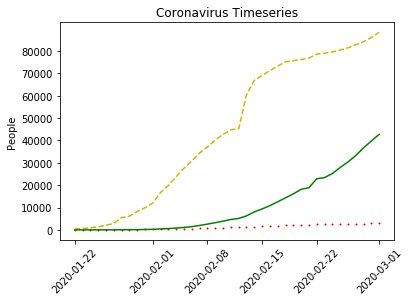

In [74]:
# Plot the graph
plt.title('Coronavirus Timeseries')        
plt.ylabel ('People')   

# Plot confirmed cases/Infected 
plt.plot(date_times,df[0],'y' ,label="Infected", linestyle='--')
# Plot deaths 
plt.plot(date_times,df[1],'r' ,label="Deaths",  linestyle='',marker ='o',markersize=1)
# Plot recovered
plt.plot(date_times,df[2],'g',label="Recovered",linestyle='-')

# Fix overlapping dates 
plt.xticks(rotation=45)

# Spread out y axis to make visible of the gaps in Y axis
maxValue = max(df.max())
plt.yticks(np.arange(0, maxValue, step=10000))

# Save the plot
plt.savefig("Cod19") # Call this before plt.show().
# Show plot
plt.show()
